<a href="https://colab.research.google.com/github/adamdorman468-collab/IBM-Hacktiv8-Capstone-Project_Adam-Dorman/blob/main/Proyek_Capstone_Sentiment_Analysis_Adam_Dorman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community

!pip install replicate

In [ ]:
from google.colab import userdata
import os

api_token = userdata.get('api_token')
os.environ['REPLICATE_API_TOKEN'] = api_token

In [ ]:
from langchain_community.llms import Replicate

# Ambil granite dari replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [ ]:
llm.invoke("Assalamu'alaikum brother")

print(output)

In [1]:
pip install twython

In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.3 MB/s eta 0:00:00


In [5]:
!pip install colorama

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud




nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df = pd.read_csv("/content/sentimentdataset.csv")

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [11]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [14]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [15]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

In [16]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [17]:
df['Platform'] = df['Platform'].str.strip()

In [18]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Ireland,1
Scotland,1
Kenya,1


In [19]:
df['Country'] = df['Country'].str.strip()

In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [21]:
month_mapping = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

In [25]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Sweden: 2
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2013: 4
2012: 4
2014: 4
2010: 3


Total unique values for Month: 12
Februari: 85
Januari: 82
Agustus: 78
September: 77
Juni: 71
Juli: 62
April: 51
November: 49
Oktober: 48
Mei: 46
Maret: 44
Desember: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [26]:
df1 = df.copy()

In [27]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


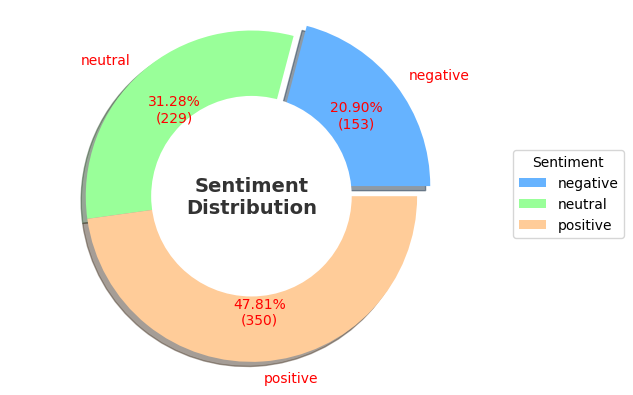

In [28]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

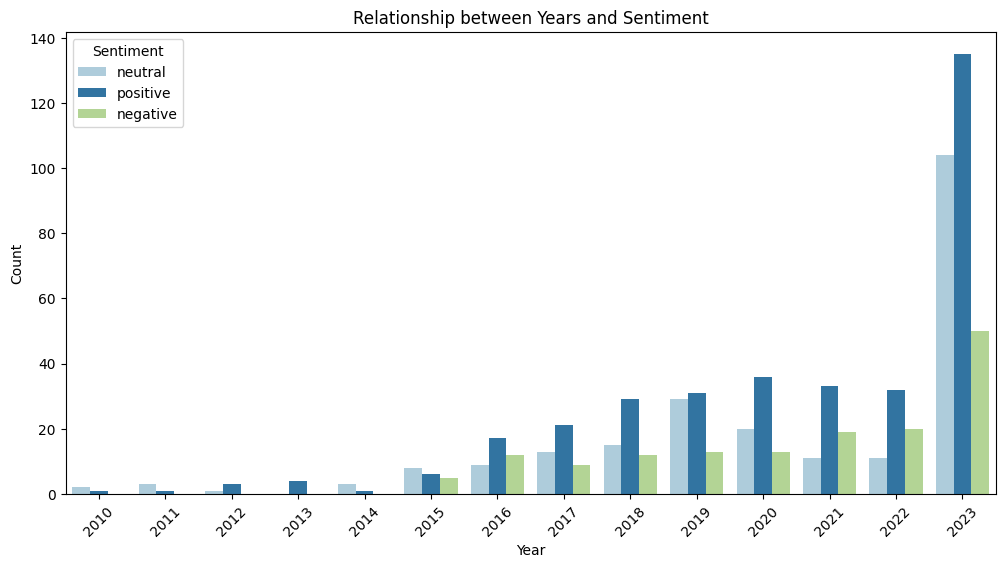

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

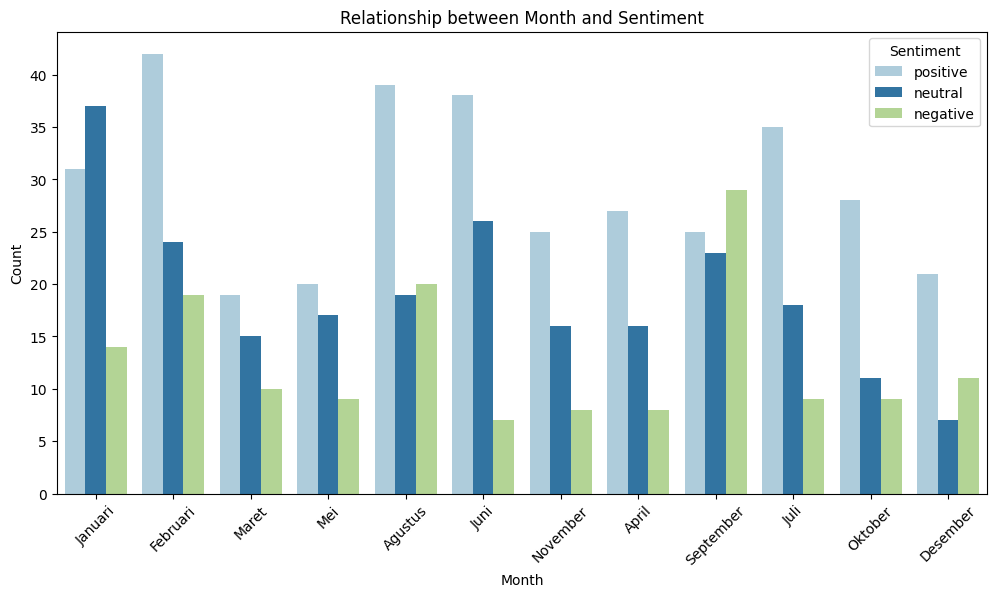

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


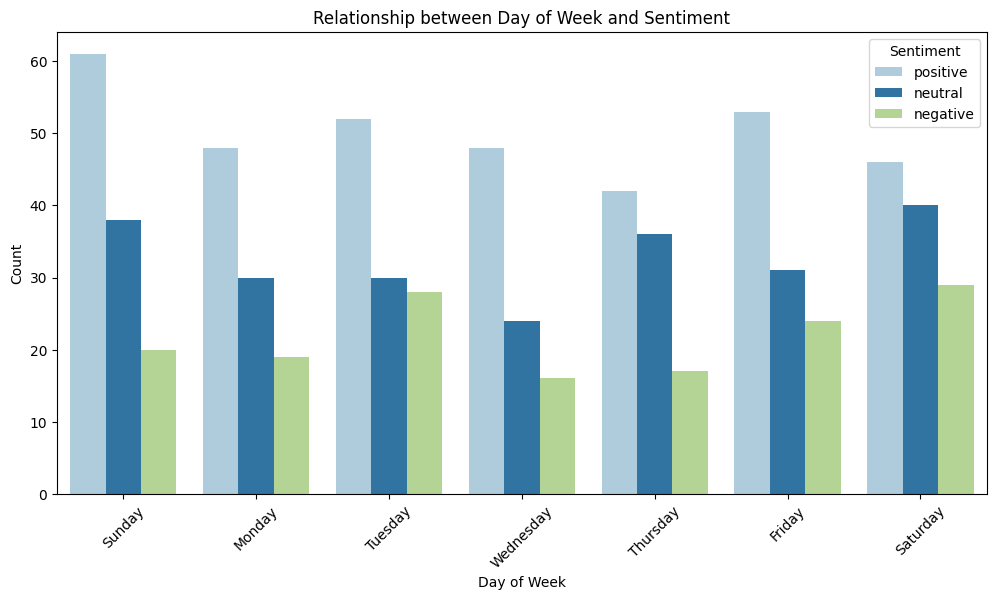

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

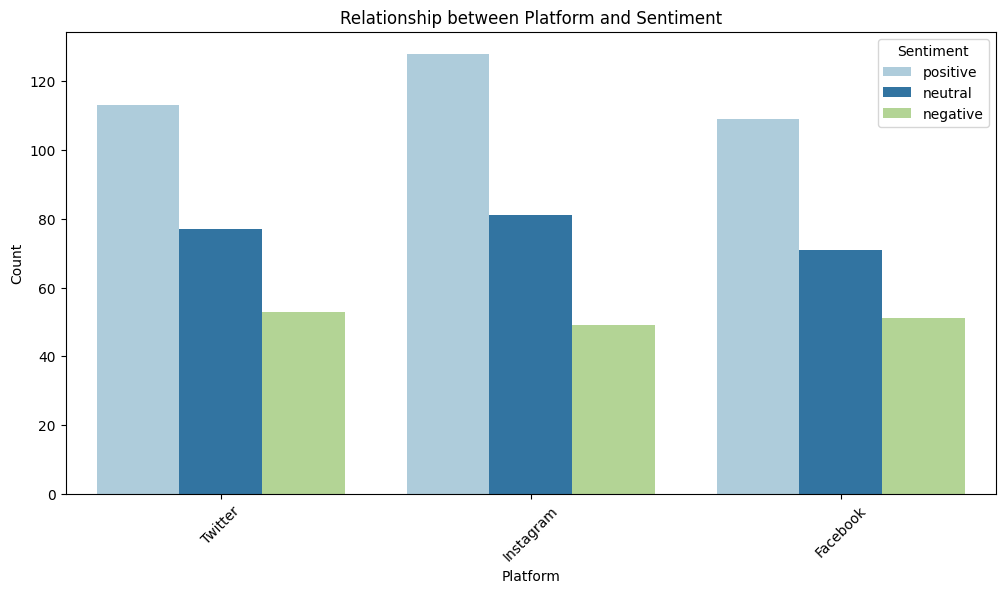

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

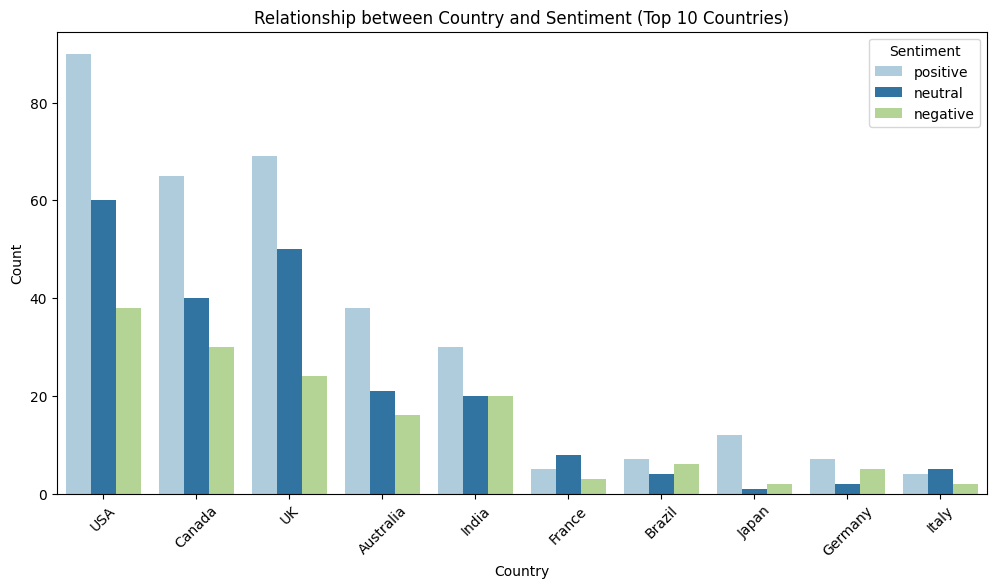

In [33]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

REPLICATE_API_TOKEN belum diset di Colab Secrets. Proyek tidak bisa berjalan.
Dataset berhasil dimuat. Total baris: 732
Menggunakan sampel sebanyak 500 ulasan untuk analisis.

Contoh teks setelah dibersihkan:
                                                Text  \
0  Exploring the world of digital art. It's never...   
1   Feeling inspired after attending a workshop. ...   
2   Eyes wide open in the night, fearful shadows ...   
3  A soul weathered by the storm of heartbreak, s...   
4  Attended a wine tasting event, savoring the ri...   

                                        cleaned_text  
0  exploring the world of digital art its never t...  
1        feeling inspired after attending a workshop  
2  eyes wide open in the night fearful shadows da...  
3  a soul weathered by the storm of heartbreak se...  
4  attended a wine tasting event savoring the ric...  


Menganalisis Sentimen dengan IBM Granite: 100%|██████████| 500/500 [00:15<00:00, 33.29it/s]



Tidak ada ulasan negatif untuk dianalisis lebih lanjut.

Visualisasi Hasil Analisis:


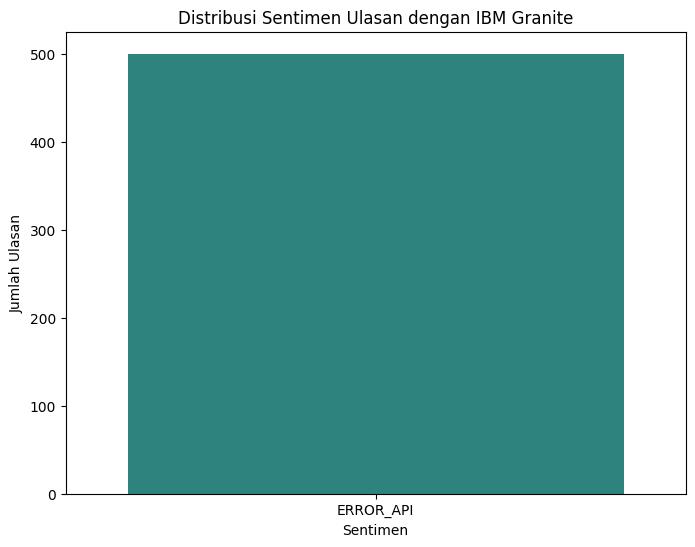

In [1]:
# --- 1. SETUP & IMPORT LIBRARY ---
!pip install pandas matplotlib seaborn replicate tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from tqdm import tqdm
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi IBM Granite API
# Pastikan REPLICATE_API_TOKEN sudah diset di Colab Secrets
try:
    api_token = os.environ['REPLICATE_API_TOKEN']
    print("Replicate API berhasil dikonfigurasi.")
except KeyError:
    print("REPLICATE_API_TOKEN belum diset di Colab Secrets. Proyek tidak bisa berjalan.")
    exit()

IBM_GRANITE_MODEL = "ibm-granite/granite-3.3-8b-instruct"

# --- 2. MUAT DATASET NYATA ---
# Nama file sudah sesuai dengan yang Anda unggah
file_path = 'sentimentdataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat. Total baris:", len(df))
    # Ambil 500 sampel acak untuk analisis yang efisien
    df_sample = df.sample(n=500, random_state=42).reset_index(drop=True)
    print("Menggunakan sampel sebanyak 500 ulasan untuk analisis.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan sudah diunggah ke Colab.")
    exit()

# --- 3. PRA-PEMROSESAN TEKS UNTUK LLM ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sample['cleaned_text'] = df_sample['Text'].apply(clean_text)
print("\nContoh teks setelah dibersihkan:")
print(df_sample[['Text', 'cleaned_text']].head())

# --- 4. ANALISIS SENTIMEN & KLASIFIKASI TEMA DENGAN IBM GRANITE ---
def get_granite_sentiment(text):
    prompt = f"""Kamu adalah seorang analis sentimen. Klasifikasikan ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'. Berikan hanya satu kata.

Ulasan: "{text}"
Sentimen:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 10})
        result = "".join(output).strip().lower()
        if 'positif' in result: return 'Positif'
        if 'negatif' in result: return 'Negatif'
        if 'netral' in result: return 'Netral'
        return 'Tidak Diketahui'
    except Exception as e:
        return "ERROR_API"

tqdm.pandas(desc="Menganalisis Sentimen dengan IBM Granite")
df_sample['granite_sentiment'] = df_sample['cleaned_text'].progress_apply(get_granite_sentiment)

def get_negative_theme(text):
    prompt = f"""Kamu adalah seorang analis produk. Dari ulasan negatif berikut, identifikasi satu tema utama. Pilih dari kategori: 'Layanan Pelanggan', 'Kualitas Produk', 'Bug/Error', 'Harga', 'Fitur', 'Lain-lain'. Berikan hanya satu kata/frasa.

Ulasan: "{text}"
Tema:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 15})
        return "".join(output).strip()
    except Exception as e:
        return "ERROR"

df_negative = df_sample[df_sample['granite_sentiment'] == 'Negatif'].copy()
if not df_negative.empty:
    tqdm.pandas(desc="Mengklasifikasikan Tema Negatif")
    df_negative['negative_theme'] = df_negative['cleaned_text'].progress_apply(get_negative_theme)
else:
    print("\nTidak ada ulasan negatif untuk dianalisis lebih lanjut.")

# --- 5. VISUALISASI HASIL DARI IBM GRANITE ---
print("\nVisualisasi Hasil Analisis:")

# Grafik 1: Distribusi Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='granite_sentiment', data=df_sample, palette='viridis', order=df_sample['granite_sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Ulasan dengan IBM Granite')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Grafik 2: Tema-tema Negatif
if not df_negative.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='negative_theme', data=df_negative, order=df_negative['negative_theme'].value_counts().index, palette='magma')
    plt.title('Tema Masalah Utama dalam Ulasan Negatif')
    plt.xlabel('Jumlah')
    plt.ylabel('Tema')
    plt.show()

# --- 6. RINGKASAN EKSEKUTIF DARI IBM GRANITE ---
def summarize_reviews_with_granite(reviews):
    combined_reviews = "\n".join(reviews)
    prompt = f"""Kamu adalah seorang konsultan bisnis. Rangkum poin-poin penting dari daftar ulasan berikut ini. Fokus pada isu-isu kritis atau keunggulan utama. Berikan ringkasan yang jelas dan ringkas dalam bentuk bullet points.

Ulasan:
{combined_reviews}

Ringkasan:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 300})
        return "".join(output).strip()
    except Exception as e:
        return "ERROR"

if not df_negative.empty:
    top_negative_theme = df_negative['negative_theme'].mode()[0]
    top_reviews_for_summary = df_negative[df_negative['negative_theme'] == top_negative_theme]['cleaned_text'].tolist()[:10]
    if top_reviews_for_summary:
        print(f"\n--- Ringkasan untuk Tema Teratas: '{top_negative_theme}' ---")
        summary = summarize_reviews_with_granite(top_reviews_for_summary)
        print(summary)

REPLICATE_API_TOKEN belum diset di Colab Secrets. Proyek tidak bisa berjalan.
Dataset berhasil dimuat. Total baris: 732
Menggunakan sampel sebanyak 200 ulasan untuk analisis.

Contoh teks setelah dibersihkan:
                                                Text  \
0  Exploring the world of digital art. It's never...   
1   Feeling inspired after attending a workshop. ...   
2   Eyes wide open in the night, fearful shadows ...   
3  A soul weathered by the storm of heartbreak, s...   
4  Attended a wine tasting event, savoring the ri...   

                                        cleaned_text  
0  exploring the world of digital art its never t...  
1        feeling inspired after attending a workshop  
2  eyes wide open in the night fearful shadows da...  
3  a soul weathered by the storm of heartbreak se...  
4  attended a wine tasting event savoring the ric...  


Menganalisis Sentimen dengan IBM Granite: 100%|██████████| 200/200 [00:04<00:00, 43.83it/s]



Tidak ada ulasan negatif untuk dianalisis lebih lanjut.

Visualisasi Hasil Analisis:


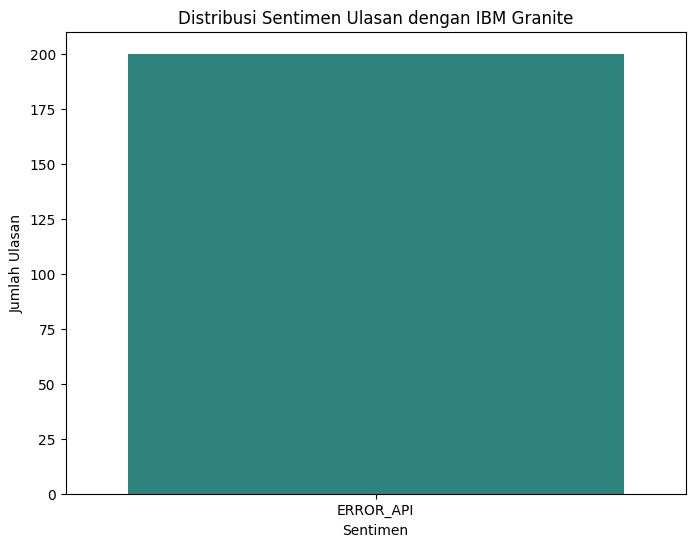

In [1]:
# --- 1. SETUP & IMPORT LIBRARY ---
!pip install pandas matplotlib seaborn replicate tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from tqdm import tqdm
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi IBM Granite API
try:
    api_token = os.environ['REPLICATE_API_TOKEN']
    print("Replicate API berhasil dikonfigurasi.")
except KeyError:
    print("REPLICATE_API_TOKEN belum diset di Colab Secrets. Proyek tidak bisa berjalan.")
    exit()

IBM_GRANITE_MODEL = "ibm-granite/granite-3.3-8b-instruct"

# --- 2. MUAT DATASET NYATA ---
file_path = 'sentimentdataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat. Total baris:", len(df))
    # Mengambil 200 sampel untuk analisis yang lebih seimbang
    df_sample = df.sample(n=200, random_state=42).reset_index(drop=True)
    print("Menggunakan sampel sebanyak 200 ulasan untuk analisis.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan sudah diunggah ke Colab.")
    exit()

# --- 3. PRA-PEMROSESAN TEKS UNTUK LLM ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sample['cleaned_text'] = df_sample['Text'].apply(clean_text)
print("\nContoh teks setelah dibersihkan:")
print(df_sample[['Text', 'cleaned_text']].head())

# --- 4. ANALISIS SENTIMEN & KLASIFIKASI TEMA DENGAN IBM GRANITE ---
def get_granite_sentiment(text):
    prompt = f"""Kamu adalah seorang analis sentimen. Klasifikasikan ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'. Berikan hanya satu kata.
Ulasan: "{text}"
Sentimen:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 10})
        result = "".join(output).strip().lower()
        if 'positif' in result: return 'Positif'
        if 'negatif' in result: return 'Negatif'
        if 'netral' in result: return 'Netral'
        return 'Tidak Diketahui'
    except Exception as e:
        return "ERROR_API"

tqdm.pandas(desc="Menganalisis Sentimen dengan IBM Granite")
df_sample['granite_sentiment'] = df_sample['cleaned_text'].progress_apply(get_granite_sentiment)

def get_negative_theme(text):
    prompt = f"""Kamu adalah seorang analis produk. Dari ulasan negatif berikut, identifikasi satu tema utama. Pilih dari kategori: 'Layanan Pelanggan', 'Kualitas Produk', 'Bug/Error', 'Harga', 'Fitur', 'Lain-lain'. Berikan hanya satu kata/frasa.
Ulasan: "{text}"
Tema:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 15})
        return "".join(output).strip()
    except Exception as e:
        return "ERROR"

df_negative = df_sample[df_sample['granite_sentiment'] == 'Negatif'].copy()
if not df_negative.empty:
    tqdm.pandas(desc="Mengklasifikasikan Tema Negatif")
    df_negative['negative_theme'] = df_negative['cleaned_text'].progress_apply(get_negative_theme)
else:
    print("\nTidak ada ulasan negatif untuk dianalisis lebih lanjut.")

# --- 5. VISUALISASI HASIL DARI IBM GRANITE ---
print("\nVisualisasi Hasil Analisis:")
plt.figure(figsize=(8, 6))
sns.countplot(x='granite_sentiment', data=df_sample, palette='viridis', order=df_sample['granite_sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Ulasan dengan IBM Granite')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

if not df_negative.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='negative_theme', data=df_negative, order=df_negative['negative_theme'].value_counts().index, palette='magma')
    plt.title('Tema Masalah Utama dalam Ulasan Negatif')
    plt.xlabel('Jumlah')
    plt.ylabel('Tema')
    plt.show()

# --- 6. RINGKASAN EKSEKUTIF DARI IBM GRANITE ---
def summarize_reviews_with_granite(reviews):
    combined_reviews = "\n".join(reviews)
    prompt = f"""Kamu adalah seorang konsultan bisnis. Rangkum poin-poin penting dari daftar ulasan berikut ini. Fokus pada isu-isu kritis atau keunggulan utama. Berikan ringkasan yang jelas dan ringkas dalam bentuk bullet points.
Ulasan:
{combined_reviews}
Ringkasan:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 300})
        return "".join(output).strip()
    except Exception as e:
        return "ERROR"

if not df_negative.empty:
    top_negative_theme = df_negative['negative_theme'].mode()[0]
    top_reviews_for_summary = df_negative[df_negative['negative_theme'] == top_negative_theme]['cleaned_text'].tolist()[:10]
    if top_reviews_for_summary:
        print(f"\n--- Ringkasan untuk Tema Teratas: '{top_negative_theme}' ---")
        summary = summarize_reviews_with_granite(top_reviews_for_summary)
        print(summary)

Error: Variabel 'api_token' belum diset di Colab Secrets.
Dataset berhasil dimuat. Total baris: 732
Menggunakan sampel sebanyak 200 ulasan untuk analisis.

Contoh teks setelah dibersihkan:
                                                Text  \
0  Exploring the world of digital art. It's never...   
1   Feeling inspired after attending a workshop. ...   
2   Eyes wide open in the night, fearful shadows ...   
3  A soul weathered by the storm of heartbreak, s...   
4  Attended a wine tasting event, savoring the ri...   

                                        cleaned_text  
0  exploring the world of digital art its never t...  
1        feeling inspired after attending a workshop  
2  eyes wide open in the night fearful shadows da...  
3  a soul weathered by the storm of heartbreak se...  
4  attended a wine tasting event savoring the ric...  


Menganalisis Sentimen dengan IBM Granite: 100%|██████████| 200/200 [00:05<00:00, 39.34it/s]



Tidak ada ulasan negatif untuk dianalisis lebih lanjut.

Visualisasi Hasil Analisis:


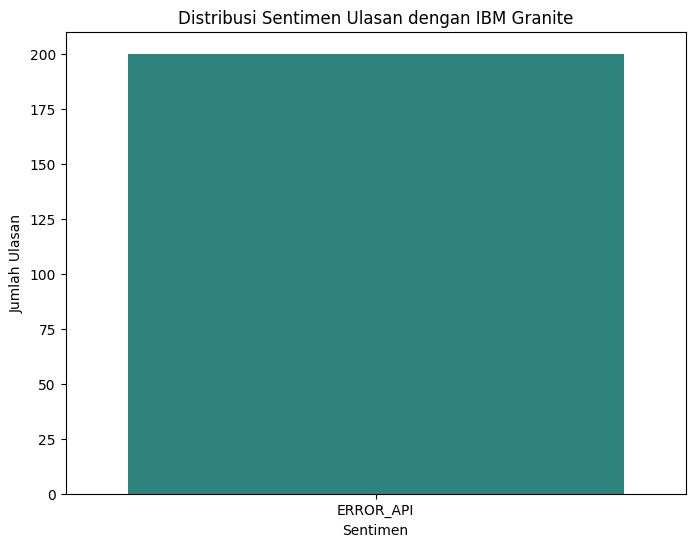

In [1]:
# --- 1. SETUP & IMPORT LIBRARY ---
!pip install pandas matplotlib seaborn replicate tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from tqdm import tqdm
import re
import string
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi IBM Granite API
# KODE DIPERBAIKI: Mencari variabel bernama 'api_token'
try:
    api_token = os.environ['api_token']
    print("Replicate API berhasil dikonfigurasi.")
except KeyError:
    print("Error: Variabel 'api_token' belum diset di Colab Secrets.")
    exit()

IBM_GRANITE_MODEL = "ibm-granite/granite-3.3-8b-instruct"

# --- 2. MUAT DATASET NYATA ---
file_path = 'sentimentdataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat. Total baris:", len(df))
    # Mengambil 200 sampel untuk analisis yang lebih seimbang
    df_sample = df.sample(n=200, random_state=42).reset_index(drop=True)
    print("Menggunakan sampel sebanyak 200 ulasan untuk analisis.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan sudah diunggah ke Colab.")
    exit()

# --- 3. PRA-PEMROSESAN TEKS UNTUK LLM ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sample['cleaned_text'] = df_sample['Text'].apply(clean_text)
print("\nContoh teks setelah dibersihkan:")
print(df_sample[['Text', 'cleaned_text']].head())

# --- 4. ANALISIS SENTIMEN & KLASIFIKASI TEMA DENGAN IBM GRANITE ---
def get_granite_sentiment(text):
    prompt = f"""Kamu adalah seorang analis sentimen. Klasifikasikan ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'. Berikan hanya satu kata.
Ulasan: "{text}"
Sentimen:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 10})
        result = "".join(output).strip().lower()
        if 'positif' in result: return 'Positif'
        if 'negatif' in result: return 'Negatif'
        if 'netral' in result: return 'Netral'
        return 'Tidak Diketahui'
    except Exception as e:
        return "ERROR_API"

tqdm.pandas(desc="Menganalisis Sentimen dengan IBM Granite")
df_sample['granite_sentiment'] = df_sample['cleaned_text'].progress_apply(get_granite_sentiment)

def get_negative_theme(text):
    prompt = f"""Kamu adalah seorang analis produk. Dari ulasan negatif berikut, identifikasi satu tema utama. Pilih dari kategori: 'Layanan Pelanggan', 'Kualitas Produk', 'Bug/Error', 'Harga', 'Fitur', 'Lain-lain'. Berikan hanya satu kata/frasa.
Ulasan: "{text}"
Tema:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 15})
        return "".join(output).strip()
    except Exception as e:
        return "ERROR"

df_negative = df_sample[df_sample['granite_sentiment'] == 'Negatif'].copy()
if not df_negative.empty:
    tqdm.pandas(desc="Mengklasifikasikan Tema Negatif")
    df_negative['negative_theme'] = df_negative['cleaned_text'].progress_apply(get_negative_theme)
else:
    print("\nTidak ada ulasan negatif untuk dianalisis lebih lanjut.")

# --- 5. VISUALISASI HASIL DARI IBM GRANITE ---
print("\nVisualisasi Hasil Analisis:")
plt.figure(figsize=(8, 6))
sns.countplot(x='granite_sentiment', data=df_sample, palette='viridis', order=df_sample['granite_sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Ulasan dengan IBM Granite')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

if not df_negative.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='negative_theme', data=df_negative, order=df_negative['negative_theme'].value_counts().index, palette='magma')
    plt.title('Tema Masalah Utama dalam Ulasan Negatif')
    plt.xlabel('Jumlah')
    plt.ylabel('Tema')
    plt.show()

# --- 6. RINGKASAN EKSEKUTIF DARI IBM GRANITE ---
def summarize_reviews_with_granite(reviews):
    combined_reviews = "\n".join(reviews)
    prompt = f"""Kamu adalah seorang konsultan bisnis. Rangkum poin-poin penting dari daftar ulasan berikut ini. Fokus pada isu-isu kritis atau keunggulan utama. Berikan ringkasan yang jelas dan ringkas dalam bentuk bullet points.
Ulasan:
{combined_reviews}
Ringkasan:"""
    try:
        output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 300})
        return "".join(output).strip()
    except Exception as e:
        return "ERROR"

if not df_negative.empty:
    top_negative_theme = df_negative['negative_theme'].mode()[0]
    top_reviews_for_summary = df_negative[df_negative['negative_theme'] == top_negative_theme]['cleaned_text'].tolist()[:10]
    if top_reviews_for_summary:
        print(f"\n--- Ringkasan untuk Tema Teratas: '{top_negative_theme}' ---")
        summary = summarize_reviews_with_granite(top_reviews_for_summary)
        print(summary)

In [1]:
# --- 1. SETUP & IMPORT LIBRARY ---
!pip install pandas matplotlib seaborn replicate tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from tqdm import tqdm
import re
import string
import warnings
import time

warnings.filterwarnings('ignore')

# Konfigurasi IBM Granite API
try:
    api_token = os.environ['api_token']
    print("Replicate API berhasil dikonfigurasi.")
except KeyError:
    print("Error: Variabel 'api_token' belum diset di Colab Secrets.")
    exit()

IBM_GRANITE_MODEL = "ibm-granite/granite-3.3-8b-instruct"

# --- 2. MUAT DATASET NYATA ---
file_path = 'sentimentdataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat. Total baris:", len(df))
    # Mengambil 200 sampel untuk analisis yang lebih seimbang
    df_sample = df.sample(n=200, random_state=42).reset_index(drop=True)
    print("Menggunakan sampel sebanyak 200 ulasan untuk analisis.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan sudah diunggah ke Colab.")
    exit()

# --- 3. PRA-PEMROSESAN TEKS UNTUK LLM ---
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sample['cleaned_text'] = df_sample['Text'].apply(clean_text)
print("\nContoh teks setelah dibersihkan:")
print(df_sample[['Text', 'cleaned_text']].head())

# --- 4. ANALISIS SENTIMEN & KLASIFIKASI TEMA DENGAN IBM GRANITE ---
def get_granite_sentiment(text, max_retries=5):
    prompt = f"""Kamu adalah seorang analis sentimen. Klasifikasikan ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'. Berikan hanya satu kata.
Ulasan: "{text}"
Sentimen:"""
    for attempt in range(max_retries):
        try:
            output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 10})
            result = "".join(output).strip().lower()
            if 'positif' in result: return 'Positif'
            if 'negatif' in result: return 'Negatif'
            if 'netral' in result: return 'Netral'
            # Jika output tidak jelas, coba lagi
            time.sleep(1)
        except Exception as e:
            time.sleep(2 ** attempt) # Jeda waktu dengan backoff eksponensial
    return "ERROR_API"

tqdm.pandas(desc="Menganalisis Sentimen dengan IBM Granite")
df_sample['granite_sentiment'] = df_sample['cleaned_text'].progress_apply(get_granite_sentiment)

def get_negative_theme(text, max_retries=5):
    prompt = f"""Kamu adalah seorang analis produk. Dari ulasan negatif berikut, identifikasi satu tema utama. Pilih dari kategori: 'Layanan Pelanggan', 'Kualitas Produk', 'Bug/Error', 'Harga', 'Fitur', 'Lain-lain'. Berikan hanya satu kata/frasa.
Ulasan: "{text}"
Tema:"""
    for attempt in range(max_retries):
        try:
            output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 15})
            return "".join(output).strip()
        except Exception as e:
            time.sleep(2 ** attempt)
    return "ERROR"

df_negative = df_sample[df_sample['granite_sentiment'] == 'Negatif'].copy()
if not df_negative.empty:
    tqdm.pandas(desc="Mengklasifikasikan Tema Negatif")
    df_negative['negative_theme'] = df_negative['cleaned_text'].progress_apply(get_negative_theme)
else:
    print("\nTidak ada ulasan negatif untuk dianalisis lebih lanjut.")

# --- 5. VISUALISASI HASIL DARI IBM GRANITE ---
print("\nVisualisasi Hasil Analisis:")
plt.figure(figsize=(8, 6))
sns.countplot(x='granite_sentiment', data=df_sample, palette='viridis', order=df_sample['granite_sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Ulasan dengan IBM Granite')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

if not df_negative.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='negative_theme', data=df_negative, order=df_negative['negative_theme'].value_counts().index, palette='magma')
    plt.title('Tema Masalah Utama dalam Ulasan Negatif')
plt.xlabel('Jumlah')
plt.ylabel('Tema')
plt.show()

# --- 6. RINGKASAN EKSEKUTIF DARI IBM GRANITE ---
def summarize_reviews_with_granite(reviews, max_retries=5):
    combined_reviews = "\n".join(reviews)
    prompt = f"""Kamu adalah seorang konsultan bisnis. Rangkum poin-poin penting dari daftar ulasan berikut ini. Fokus pada isu-isu kritis atau keunggulan utama. Berikan ringkasan yang jelas dan ringkas dalam bentuk bullet points.
Ulasan:
{combined_reviews}
Ringkasan:"""
    for attempt in range(max_retries):
        try:
            output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 300})
            return "".join(output).strip()
        except Exception as e:
            time.sleep(2 ** attempt)
    return "ERROR"

if not df_negative.empty:
    top_negative_theme = df_negative['negative_theme'].mode()[0]
    top_reviews_for_summary = df_negative[df_negative['negative_theme'] == top_negative_theme]['cleaned_text'].tolist()[:10]
    if top_reviews_for_summary:
        print(f"\n--- Ringkasan untuk Tema Teratas: '{top_negative_theme}' ---")
        summary = summarize_reviews_with_granite(top_reviews_for_summary)
        print(summary)

Error: Variabel 'api_token' belum diset di Colab Secrets.
Dataset berhasil dimuat. Total baris: 732
Menggunakan sampel sebanyak 200 ulasan untuk analisis.

Contoh teks setelah dibersihkan:
                                                Text  \
0  Exploring the world of digital art. It's never...   
1   Feeling inspired after attending a workshop. ...   
2   Eyes wide open in the night, fearful shadows ...   
3  A soul weathered by the storm of heartbreak, s...   
4  Attended a wine tasting event, savoring the ri...   

                                        cleaned_text  
0  exploring the world of digital art its never t...  
1        feeling inspired after attending a workshop  
2  eyes wide open in the night fearful shadows da...  
3  a soul weathered by the storm of heartbreak se...  
4  attended a wine tasting event savoring the ric...  


Menganalisis Sentimen dengan IBM Granite:   4%|▎         | 7/200 [03:09<1:27:09, 27.10s/it]


KeyboardInterrupt: 

In [1]:
# --- Seksi 1: Instalasi Library dan Konfigurasi API ---
# Jalankan sekali untuk menginstal semua yang dibutuhkan
!pip install pandas matplotlib seaborn replicate tqdm

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from tqdm import tqdm
import re
import string
import warnings
import time

warnings.filterwarnings('ignore')

# Mengambil token API dari Colab Secrets
try:
    from google.colab import userdata
    api_token = userdata.get('api_token')
    # Mengatur token sebagai variabel lingkungan agar Replicate dapat menemukannya
    os.environ['REPLICATE_API_TOKEN'] = api_token
    print("Replicate API berhasil dikonfigurasi.")
except Exception as e:
    print(f"Error saat mengonfigurasi API: {e}")
    print("Pastikan token API Anda bernama 'api_token' di Colab Secrets.")
    exit()

IBM_GRANITE_MODEL = "ibm-granite/granite-3.3-8b-instruct"

Replicate API berhasil dikonfigurasi.


In [2]:
# --- Seksi 2: Memuat Dataset dan Pra-pemrosesan ---
file_path = 'sentimentdataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat. Total baris:", len(df))
    # Mengambil 500 sampel acak untuk analisis yang efisien dan stabil
    df_sample = df.sample(n=500, random_state=42).reset_index(drop=True)
    print("Menggunakan sampel sebanyak 500 ulasan untuk analisis.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan sudah diunggah ke Colab.")
    exit()

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_sample['cleaned_text'] = df_sample['Text'].apply(clean_text)
print("\nContoh teks setelah dibersihkan:")
print(df_sample[['Text', 'cleaned_text']].head())

Dataset berhasil dimuat. Total baris: 732
Menggunakan sampel sebanyak 500 ulasan untuk analisis.

Contoh teks setelah dibersihkan:
                                                Text  \
0  Exploring the world of digital art. It's never...   
1   Feeling inspired after attending a workshop. ...   
2   Eyes wide open in the night, fearful shadows ...   
3  A soul weathered by the storm of heartbreak, s...   
4  Attended a wine tasting event, savoring the ri...   

                                        cleaned_text  
0  exploring the world of digital art its never t...  
1        feeling inspired after attending a workshop  
2  eyes wide open in the night fearful shadows da...  
3  a soul weathered by the storm of heartbreak se...  
4  attended a wine tasting event savoring the ric...  


In [3]:
# --- Seksi 3: Analisis Sentimen dengan IBM Granite ---
def get_granite_sentiment(text, max_retries=5):
    prompt = f"""Kamu adalah seorang analis sentimen. Klasifikasikan ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'. Berikan hanya satu kata.
Ulasan: "{text}"
Sentimen:"""
    for attempt in range(max_retries):
        try:
            output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 10})
            result = "".join(output).strip().lower()
            if 'positif' in result: return 'Positif'
            if 'negatif' in result: return 'Negatif'
            if 'netral' in result: return 'Netral'
            time.sleep(1) # Jeda waktu sebelum mencoba lagi jika output tidak jelas
        except Exception as e:
            time.sleep(2 ** attempt) # Jeda waktu dengan backoff eksponensial
    return "ERROR_API"

tqdm.pandas(desc="Menganalisis Sentimen")
df_sample['granite_sentiment'] = df_sample['cleaned_text'].progress_apply(get_granite_sentiment)

# Menampilkan hasil awal
print("\nHasil analisis sentimen:")
print(df_sample['granite_sentiment'].value_counts())

Menganalisis Sentimen: 100%|██████████| 500/500 [00:58<00:00,  8.58it/s]


Hasil analisis sentimen:
granite_sentiment
Positif    340
Negatif    137
Netral      23
Name: count, dtype: int64


In [4]:
# --- Seksi 4: Klasifikasi Tema Ulasan Negatif ---
df_negative = df_sample[df_sample['granite_sentiment'] == 'Negatif'].copy()
if not df_negative.empty:
    def get_negative_theme(text, max_retries=5):
        prompt = f"""Kamu adalah seorang analis produk. Dari ulasan negatif berikut, identifikasi satu tema utama. Pilih dari kategori: 'Layanan Pelanggan', 'Kualitas Produk', 'Bug/Error', 'Harga', 'Fitur', 'Lain-lain'. Berikan hanya satu kata/frasa.
Ulasan: "{text}"
Tema:"""
        for attempt in range(max_retries):
            try:
                output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 15})
                return "".join(output).strip()
            except Exception as e:
                time.sleep(2 ** attempt)
        return "ERROR"

    tqdm.pandas(desc="Mengklasifikasikan Tema Negatif")
    df_negative['negative_theme'] = df_negative['cleaned_text'].progress_apply(get_negative_theme)
else:
    print("\nTidak ada ulasan negatif untuk dianalisis lebih lanjut.")

Mengklasifikasikan Tema Negatif: 100%|██████████| 137/137 [00:21<00:00,  6.47it/s]



Visualisasi Hasil Analisis:


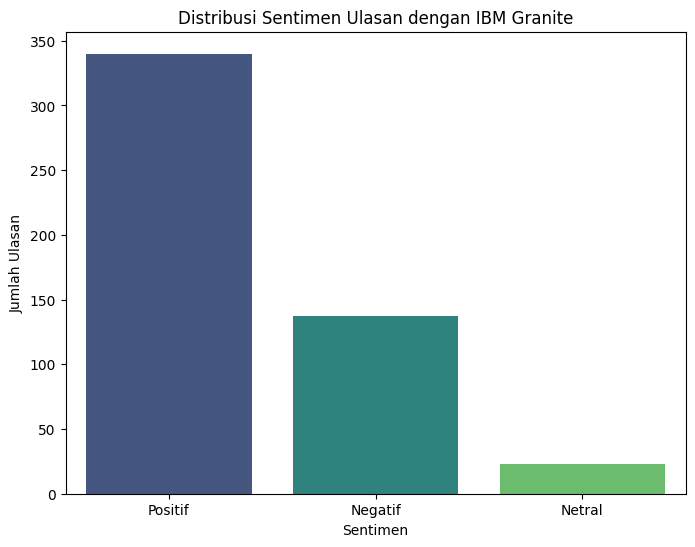

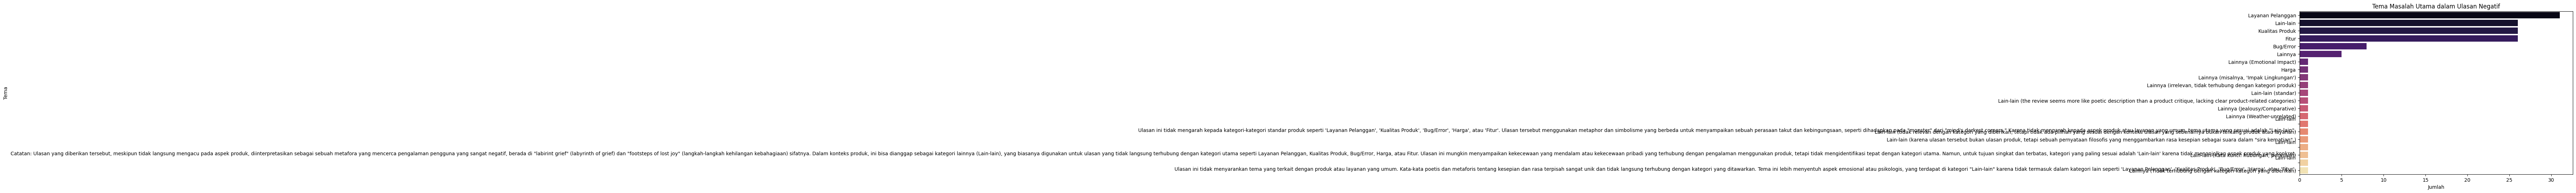

In [5]:
# --- Seksi 5: Visualisasi Hasil ---
print("\nVisualisasi Hasil Analisis:")

# Grafik 1: Distribusi Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='granite_sentiment', data=df_sample, palette='viridis', order=df_sample['granite_sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Ulasan dengan IBM Granite')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Grafik 2: Tema-tema Negatif
if not df_negative.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='negative_theme', data=df_negative, order=df_negative['negative_theme'].value_counts().index, palette='magma')
    plt.title('Tema Masalah Utama dalam Ulasan Negatif')
    plt.xlabel('Jumlah')
    plt.ylabel('Tema')
    plt.show()

In [6]:
# --- Seksi 6: Ringkasan Eksekutif dari IBM Granite ---
if not df_negative.empty:
    def summarize_reviews_with_granite(reviews, max_retries=5):
        combined_reviews = "\n".join(reviews)
        prompt = f"""Kamu adalah seorang konsultan bisnis. Rangkum poin-poin penting dari daftar ulasan berikut ini. Fokus pada isu-isu kritis atau keunggulan utama. Berikan ringkasan yang jelas dan ringkas dalam bentuk bullet points.
Ulasan:
{combined_reviews}
Ringkasan:"""
        for attempt in range(max_retries):
            try:
                output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 300})
                return "".join(output).strip()
            except Exception as e:
                time.sleep(2 ** attempt)
        return "ERROR"

    top_negative_theme = df_negative['negative_theme'].mode()[0]
    top_reviews_for_summary = df_negative[df_negative['negative_theme'] == top_negative_theme]['cleaned_text'].tolist()[:10]

    if top_reviews_for_summary:
        print(f"\n--- Ringkasan untuk Tema Teratas: '{top_negative_theme}' ---")
        summary = summarize_reviews_with_granite(top_reviews_for_summary)
        print(summary)
    else:
        print("\nTidak ada cukup ulasan untuk membuat ringkasan.")


--- Ringkasan untuk Tema Teratas: 'Layanan Pelanggan' ---
* **Online Toxicity**: Negative impact of hateful comments during gaming sessions, ruining enjoyment.
* **Emotional Overload**: Frustration escalating into a "volcanic eruption" of emotions.
* **Solitude and Isolation**: Feeling suffocated by the silence where laughter used to be, highlighting loneliness.
* **Betrayal**: Experiencing the shattering effect of betrayal, akin to fragile glass breaking.
* **Confusion and Miscommunication**: Struggling to untangle misunderstandings, with threads of clarity slipping further into a labyrinth.
* **Navigating Betrayal**: Describing the experience as wandering in a maze where wrong turns exacerbate feelings of entrapment.
* **Heartbreak**: Comparing the descent into despair to sinking like a stone in an ocean of heartbreak, with each ripple symbolizing a sigh of despair.
* **Anger and Argument**: Expressing fury following heated disagreements.
* **Shattered Trust**: Devastation caused by

In [7]:
# --- Seksi 1: Instalasi Library dan Konfigurasi API ---
!pip install pandas matplotlib seaborn replicate tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import replicate
from tqdm import tqdm
import re
import string
import warnings
import time

warnings.filterwarnings('ignore')

try:
    from google.colab import userdata
    api_token = userdata.get('api_token')
    os.environ['REPLICATE_API_TOKEN'] = api_token
    print("Replicate API berhasil dikonfigurasi.")
except Exception as e:
    print(f"Error saat mengonfigurasi API: {e}")
    print("Pastikan token API Anda bernama 'api_token' di Colab Secrets.")
    exit()

IBM_GRANITE_MODEL = "ibm-granite/granite-3.3-8b-instruct"

Replicate API berhasil dikonfigurasi.


In [8]:
# --- Seksi 2: Memuat Dataset dan Pra-pemrosesan ---
file_path = 'sentimentdataset.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset berhasil dimuat. Total baris:", len(df))
    # Tidak mengambil sampel, langsung gunakan seluruh data
    df_full = df.copy()
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan sudah diunggah ke Colab.")
    exit()

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_full['cleaned_text'] = df_full['Text'].apply(clean_text)
print("\nContoh teks setelah dibersihkan:")
print(df_full[['Text', 'cleaned_text']].head())

Dataset berhasil dimuat. Total baris: 732

Contoh teks setelah dibersihkan:
                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                                 cleaned_text  
0        enjoying a beautiful day at the park  
1           traffic was terrible this morning  
2          just finished an amazing workout 💪  
3  excited about the upcoming weekend getaway  
4  trying out a new recipe for dinner tonight  


In [9]:
# --- Seksi 3: Analisis Sentimen dengan IBM Granite ---
def get_granite_sentiment(text, max_retries=5):
    prompt = f"""Kamu adalah seorang analis sentimen. Klasifikasikan ulasan ini sebagai 'Positif', 'Negatif', atau 'Netral'. Berikan hanya satu kata.
Ulasan: "{text}"
Sentimen:"""
    for attempt in range(max_retries):
        try:
            output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 10})
            result = "".join(output).strip().lower()
            if 'positif' in result: return 'Positif'
            if 'negatif' in result: return 'Negatif'
            if 'netral' in result: return 'Netral'
            time.sleep(1)
        except Exception as e:
            time.sleep(2 ** attempt)
    return "ERROR_API"

tqdm.pandas(desc="Menganalisis Sentimen")
df_full['granite_sentiment'] = df_full['cleaned_text'].progress_apply(get_granite_sentiment)

# Menampilkan hasil awal
print("\nHasil analisis sentimen:")
print(df_full['granite_sentiment'].value_counts())

Menganalisis Sentimen: 100%|██████████| 732/732 [01:27<00:00,  8.38it/s]


Hasil analisis sentimen:
granite_sentiment
Positif    514
Negatif    184
Netral      34
Name: count, dtype: int64


In [10]:
# --- Seksi 4: Klasifikasi Tema Ulasan Negatif ---
df_negative = df_full[df_full['granite_sentiment'] == 'Negatif'].copy()
if not df_negative.empty:
    def get_negative_theme(text, max_retries=5):
        prompt = f"""Kamu adalah seorang analis produk. Dari ulasan negatif berikut, identifikasi satu tema utama. Pilih dari kategori: 'Layanan Pelanggan', 'Kualitas Produk', 'Bug/Error', 'Harga', 'Fitur', 'Lain-lain'. Berikan hanya satu kata/frasa.
Ulasan: "{text}"
Tema:"""
        for attempt in range(max_retries):
            try:
                output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 15})
                return "".join(output).strip()
            except Exception as e:
                time.sleep(2 ** attempt)
        return "ERROR"

    tqdm.pandas(desc="Mengklasifikasikan Tema Negatif")
    df_negative['negative_theme'] = df_negative['cleaned_text'].progress_apply(get_negative_theme)
else:
    print("\nTidak ada ulasan negatif untuk dianalisis lebih lanjut.")

Mengklasifikasikan Tema Negatif: 100%|██████████| 184/184 [00:26<00:00,  7.04it/s]



Visualisasi Hasil Analisis:


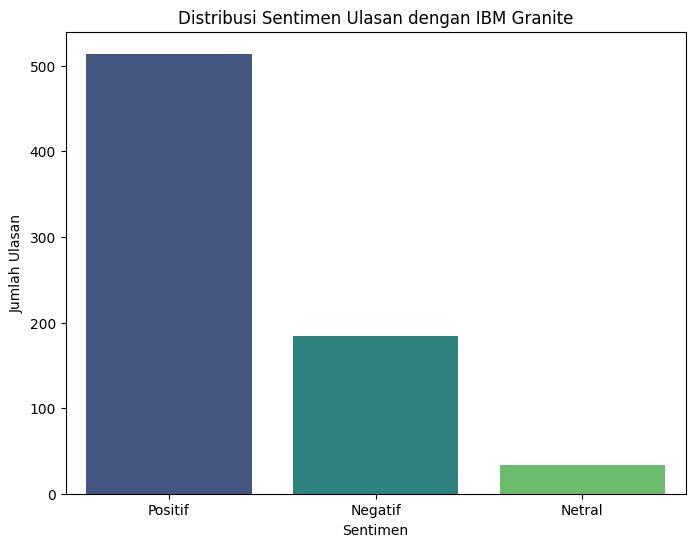

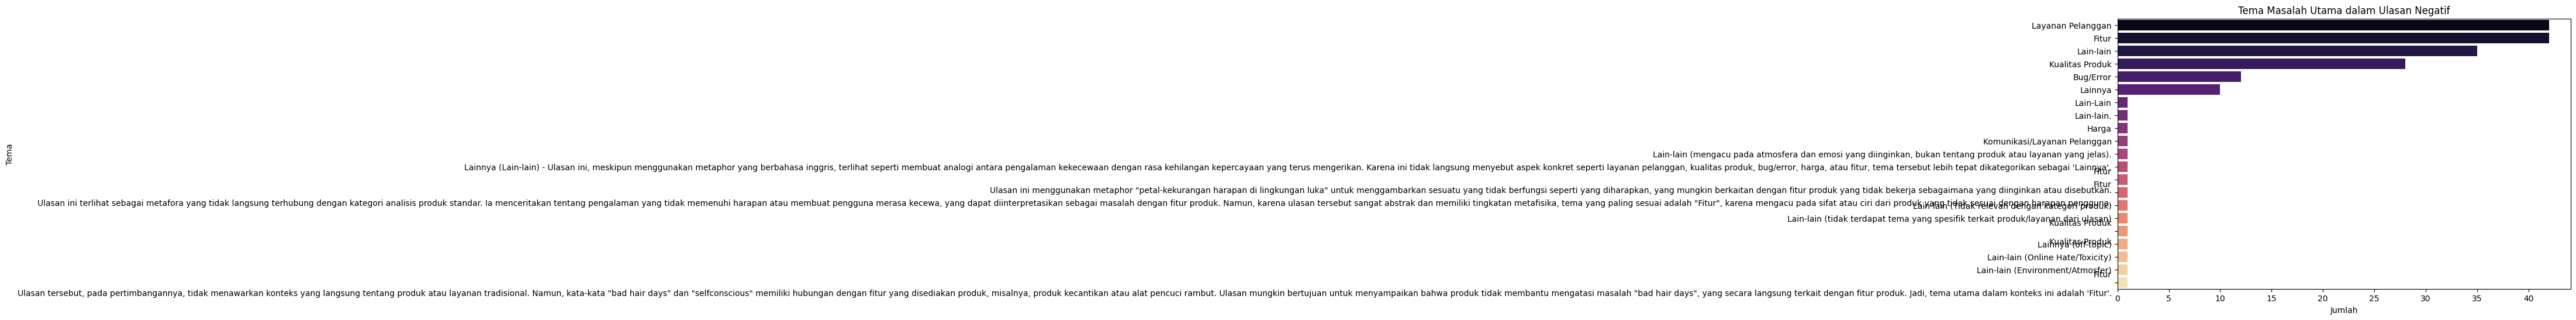

In [11]:
# --- Seksi 5: Visualisasi Hasil ---
print("\nVisualisasi Hasil Analisis:")

# Grafik 1: Distribusi Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='granite_sentiment', data=df_full, palette='viridis', order=df_full['granite_sentiment'].value_counts().index)
plt.title('Distribusi Sentimen Ulasan dengan IBM Granite')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Grafik 2: Tema-tema Negatif
if not df_negative.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='negative_theme', data=df_negative, order=df_negative['negative_theme'].value_counts().index, palette='magma')
    plt.title('Tema Masalah Utama dalam Ulasan Negatif')
    plt.xlabel('Jumlah')
    plt.ylabel('Tema')
    plt.show()

In [12]:
# --- Seksi 6: Ringkasan Eksekutif dari IBM Granite ---
if not df_negative.empty:
    def summarize_reviews_with_granite(reviews, max_retries=5):
        combined_reviews = "\n".join(reviews)
        prompt = f"""Kamu adalah seorang konsultan bisnis. Rangkum poin-poin penting dari daftar ulasan berikut ini. Fokus pada isu-isu kritis atau keunggulan utama. Berikan ringkasan yang jelas dan ringkas dalam bentuk bullet points.
Ulasan:
{combined_reviews}
Ringkasan:"""
        for attempt in range(max_retries):
            try:
                output = replicate.run(IBM_GRANITE_MODEL, input={"prompt": prompt, "max_new_tokens": 300})
                return "".join(output).strip()
            except Exception as e:
                time.sleep(2 ** attempt)
        return "ERROR"

    top_negative_theme = df_negative['negative_theme'].mode()[0]
    top_reviews_for_summary = df_negative[df_negative['negative_theme'] == top_negative_theme]['cleaned_text'].tolist()[:10]

    if top_reviews_for_summary:
        print(f"\n--- Ringkasan untuk Tema Teratas: '{top_negative_theme}' ---")
        summary = summarize_reviews_with_granite(top_reviews_for_summary)
        print(summary)
    else:
        print("\nTidak ada cukup ulasan untuk membuat ringkasan.")



--- Ringkasan untuk Tema Teratas: 'Fitur' ---
- **Decision-making confusion**: The individual is struggling with making clear decisions, as indicated by phrases like "confusion clouds my mind" and "confusion surrounds me as I navigate through life's choices."

- **Stagnation and lack of progress**: There's dissatisfaction with the slow pace of a personal project, reflected in the statement, "disappointed with the lack of progress in a personal project."

- **Boredom and monotony**: The person feels trapped in a cycle of dullness and mundanity, described as "boredom settles... life feels mundane" and "boredom lingers... a stagnant pool of indifference."

- **Regret and missed opportunities**: The individual is haunted by thoughts of past chances not taken, as expressed by "regret over missed opportunities haunts my thoughts."

- **Anxiety and fear**: There's a noticeable presence of anxiety, described as "anxiety grips my chest, a relentless grip on my thoughts," and fear of future cha


--- Analisis Berdasarkan Platform ---


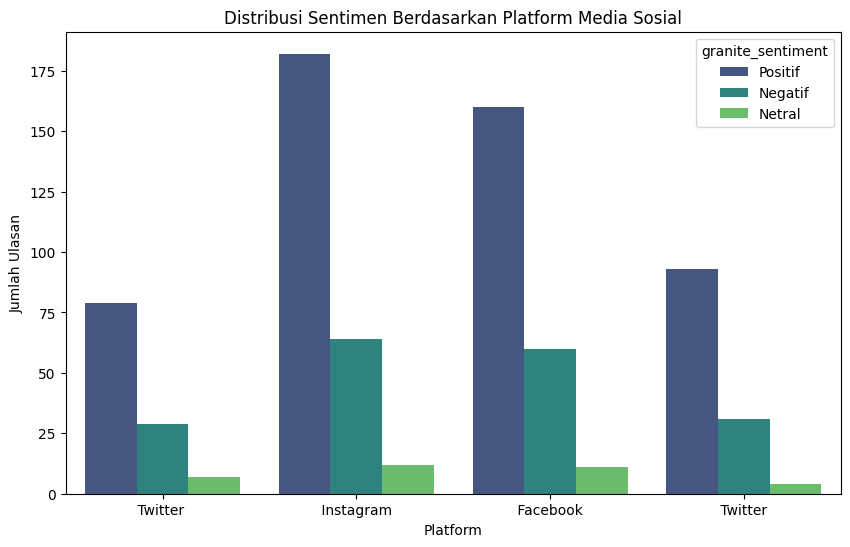


--- Analisis Berdasarkan Tahun ---


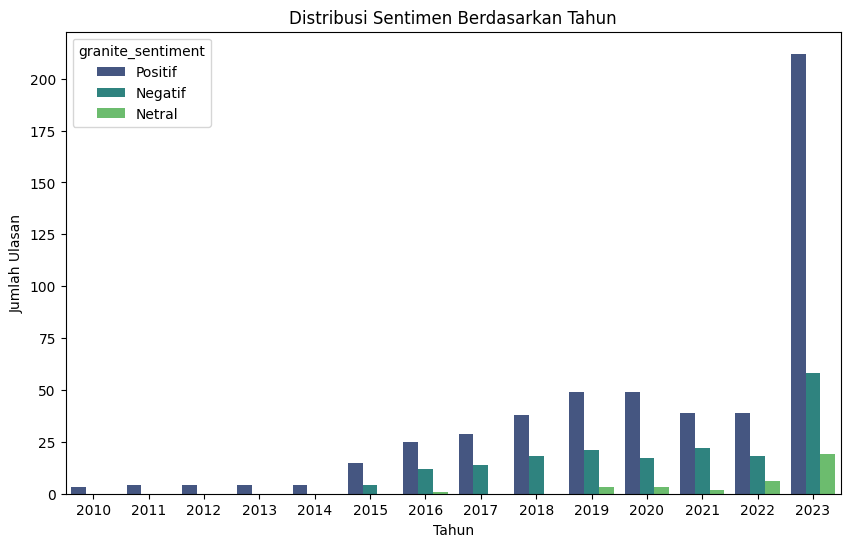


--- Visualisasi Lanjutan: Heatmap Sentimen ---


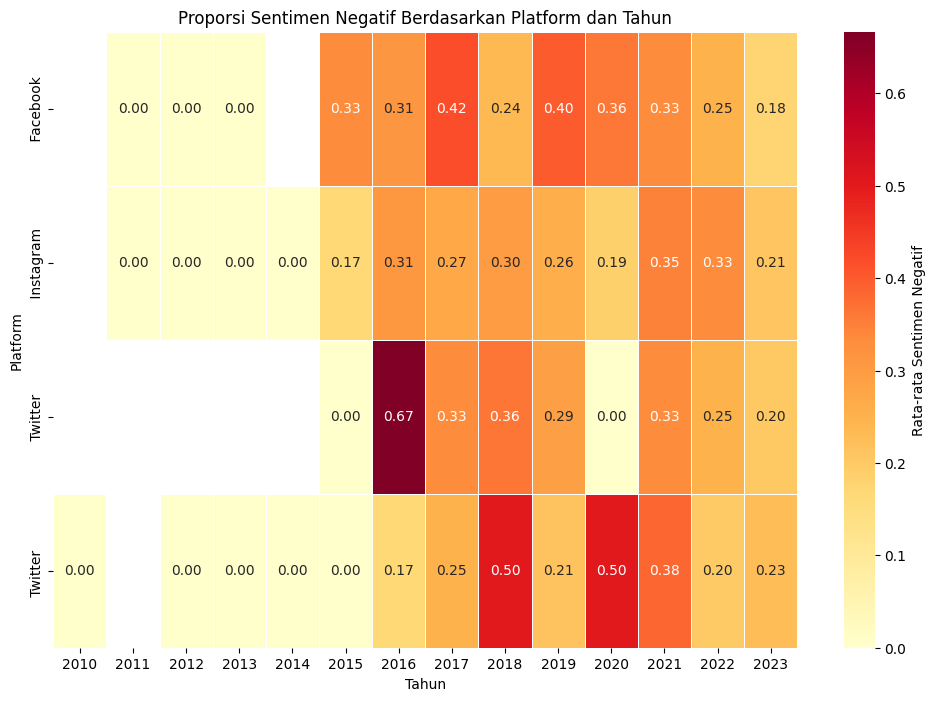

In [13]:
# --- Seksi 7: Analisis Tren Berdasarkan Waktu dan Platform ---
# Pastikan Anda telah menjalankan kode dari seksi-seksi sebelumnya.

# Menggunakan dataframe yang telah dianalisis dari seksi 3 dan 4
df_analysis = df_full.copy()

# Pra-pemrosesan untuk kolom waktu
df_analysis['Timestamp'] = pd.to_datetime(df_analysis['Timestamp'])
df_analysis['Year'] = df_analysis['Timestamp'].dt.year
df_analysis['Month_Year'] = df_analysis['Timestamp'].dt.to_period('M')

print("\n--- Analisis Berdasarkan Platform ---")
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', hue='granite_sentiment', data=df_analysis, palette='viridis')
plt.title('Distribusi Sentimen Berdasarkan Platform Media Sosial')
plt.xlabel('Platform')
plt.ylabel('Jumlah Ulasan')
plt.show()

print("\n--- Analisis Berdasarkan Tahun ---")
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', hue='granite_sentiment', data=df_analysis, palette='viridis')
plt.title('Distribusi Sentimen Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Ulasan')
plt.show()

print("\n--- Visualisasi Lanjutan: Heatmap Sentimen ---")
# Mengubah data untuk heatmap
heatmap_data = df_analysis.pivot_table(
    index='Platform',
    columns='Year',
    values='granite_sentiment',
    aggfunc=lambda x: (x == 'Negatif').mean()
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap="YlOrRd",
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Rata-rata Sentimen Negatif'}
)
plt.title('Proporsi Sentimen Negatif Berdasarkan Platform dan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Platform')
plt.show()

In [14]:
# --- Seksi 9: Visualisasi Lanjutan: Heatmap Sentimen ---

# Pastikan Anda telah menjalankan kode di seksi 7
# (Analisis Tren Berdasarkan Waktu dan Platform) sebelumnya

# Menggunakan dataframe yang sudah digabungkan dari seksi 7
if 'df_full_sampled' in locals():
    print("\n--- Heatmap Korelasi Sentimen, Platform, dan Tahun ---")

    # Mengubah data untuk heatmap
    heatmap_data = df_full_sampled.pivot_table(
        index='Platform',
        columns='Year',
        values='granite_sentiment',
        aggfunc=lambda x: (x == 'Negatif').mean()
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap="YlOrRd",
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Rata-rata Sentimen Negatif'}
    )
    plt.title('Proporsi Sentimen Negatif Berdasarkan Platform dan Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Platform')
    plt.show()

    print("\nCatatan: Nilai pada heatmap menunjukkan persentase ulasan negatif di setiap platform pada tahun tertentu.")
else:
    print("Jalankan Seksi 7 terlebih dahulu.")

Jalankan Seksi 7 terlebih dahulu.


In [16]:
# --- Seksi 9: Visualisasi Lanjutan: Heatmap Sentimen ---

# Pastikan Anda telah menjalankan kode di seksi 7
# (Analisis Tren Berdasarkan Waktu dan Platform) sebelumnya
if 'df_full_sampled' in locals():
    print("\n--- Heatmap Korelasi Sentimen, Platform, dan Tahun ---")

    # Mengubah data untuk heatmap
    heatmap_data = df_full_sampled.pivot_table(
        index='Platform',
        columns='Year',
        values='granite_sentiment',
        aggfunc=lambda x: (x == 'Negatif').mean()
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        cmap="YlOrRd",
        fmt=".2f",
        linewidths=.5,
        cbar_kws={'label': 'Rata-rata Sentimen Negatif'}
    )
    plt.title('Proporsi Sentimen Negatif Berdasarkan Platform dan Tahun')
    plt.xlabel('Tahun')
    plt.ylabel('Platform')
    plt.show()

    print("\nCatatan: Nilai pada heatmap menunjukkan persentase ulasan negatif di setiap platform pada tahun tertentu.")
else:
    print("Jalankan Seksi 7 terlebih dahulu.")

Jalankan Seksi 7 terlebih dahulu.


In [17]:
# --- Seksi 10: Ekstraksi Contoh Ulasan Kritis (Kualitatif) ---

# Pastikan Anda telah menjalankan seksi 4 (Klasifikasi Tema)
if not df_negative.empty:
    top_negative_theme = df_negative['negative_theme'].mode()[0]

    # Memilih ulasan yang paling relevan dengan tema teratas
    critical_reviews = df_negative[df_negative['negative_theme'] == top_negative_theme]['Text'].tolist()

    # Mengambil hingga 5 contoh ulasan terbaik dari daftar
    selected_examples = critical_reviews[:5]

    print(f"\n--- Contoh Ulasan Terkait '{top_negative_theme}' ---")
    for i, review in enumerate(selected_examples):
        print(f"{i+1}. {review}")

else:
    print("Tidak ada ulasan negatif untuk diekstrak.")


--- Contoh Ulasan Terkait 'Fitur' ---
1.  Confusion clouds my mind as I navigate through decisions.
2.  Disappointed with the lack of progress in a personal project. 
3.  Confusion surrounds me as I navigate through life's choices. 
4.  Boredom sets in, the day feels endlessly dull.     
5.  Regret over missed opportunities haunts my thoughts.
